<a href="https://colab.research.google.com/github/maorgreshler/NN_google_colab/blob/main/certified_NN_with_plots_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['vehicle_simulation_data_random_test.csv']))
print(df.head())

In [2]:
input_columns = ["velocity", "yaw_angle", "yaw_rate", "slip_angle", "front_wheel", "back_wheel" , "acceleration", "angular_acceleration"]

output_columns = ["delta_x_position", "delta_y_position", "delta_theta", "delta_velocity", "delta_yaw_angle",
                  "delta_yaw_rate", "delta_slip_angle", "delta_front_wheel", "delta_back_wheel"]

input_data = df[input_columns]
output_data = df[output_columns]

Epoch [10/100], Train Loss: 0.9242, Test Loss: 0.8825
Epoch [20/100], Train Loss: 0.8254, Test Loss: 0.7832
Epoch [30/100], Train Loss: 0.7317, Test Loss: 0.6897
Epoch [40/100], Train Loss: 0.6771, Test Loss: 0.6375
Epoch [50/100], Train Loss: 0.6555, Test Loss: 0.6174
Epoch [60/100], Train Loss: 0.6357, Test Loss: 0.5981
Epoch [70/100], Train Loss: 0.6163, Test Loss: 0.5780
Epoch [80/100], Train Loss: 0.5969, Test Loss: 0.5583
Epoch [90/100], Train Loss: 0.5769, Test Loss: 0.5387
Epoch [100/100], Train Loss: 0.5572, Test Loss: 0.5195


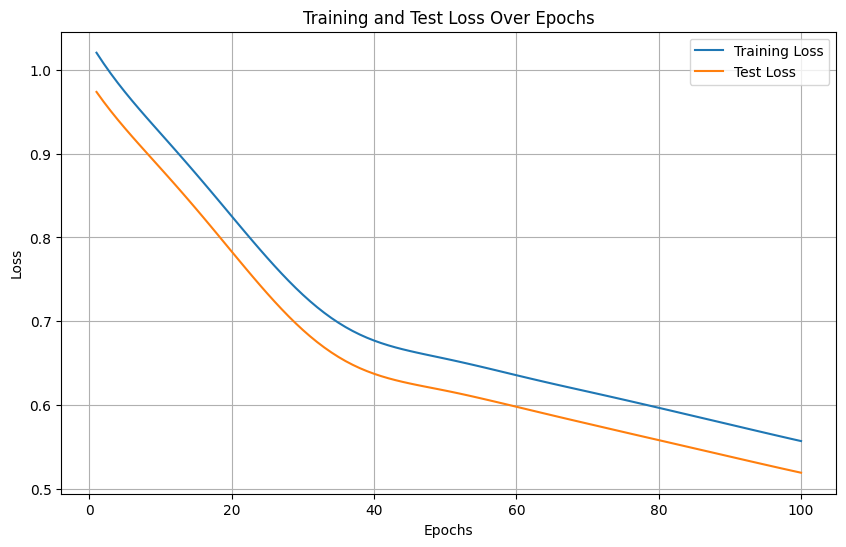

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Convert pandas DataFrames to numpy arrays
X = input_data.values
y = output_data.values
# Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model, define loss function and optimizer
input_size = X_train.shape[1]
output_size = y_train.shape[1]
model = MLP(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store losses for the plots
train_losses = []
test_losses = []

# Train the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Record training loss
    train_losses.append(loss.item())

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

In [4]:
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions = scaler_y.inverse_transform(predictions.numpy())

print("Predictions:")
print(predictions)

Predictions:
[[ 5.6474850e-02 -7.2726957e-02 -2.7095971e-03 ...  3.0568670e-04
  -6.5718660e+00 -8.0532179e+00]
 [ 6.4374618e-02 -1.0767688e-01  3.0818598e-03 ... -5.8828620e-04
  -3.9981723e+00 -5.2706733e+00]
 [ 2.3480523e-03  3.1798728e-02 -1.0757732e-03 ... -9.5848348e-03
  -3.5688608e+00 -3.4898481e+00]
 ...
 [-2.3893638e-02  1.8890055e-02  4.9846881e-04 ... -2.3864582e-03
  -6.2423244e+00 -7.9664078e+00]
 [-1.1826954e-02  7.3346430e-03 -2.2084631e-03 ...  1.5400603e-04
  -1.8853322e+00 -4.2781391e+00]
 [ 4.6469897e-02  8.1814244e-02  3.8280460e-04 ... -8.8031888e-03
  -3.4374874e+00 -3.6951115e+00]]
